In [1]:
def attention_head(n_tokens, dim, dim_head):
    macs = 0
    
    # token -> k, q, v
    macs += n_tokens * 3 * dim * dim_head
    
    # q * k'
    # (n_tokens, dim_head) * (dim_head, n_tokens) -> (n_tokens, n_tokens)
    macs += n_tokens * dim_head * n_tokens
    
    # Softmax e diviso sqrt(dim_head) 
    # ...
    
    # (q * k') * v
    # (n_tokens, n_tokens) * (n_tokens, dim_head) -> (n_tokens, dim_head)
    macs += n_tokens * n_tokens * dim_head
    
    return macs
    
def attention(n_tokens, dim, dim_head, n_heads):
    macs = 0
    
    macs += n_heads * attention_head(n_tokens, dim, dim_head)
    
    # Riporta gli z concatenati a dimensione dim
    macs += n_tokens * (dim_head * n_heads) * dim if not (n_heads == 1 and dim_head == dim) else 0
    
    return macs

In [2]:
def feed_forward(n_tokens, dim, mlp_dim):
    # 2 Linear: dim -> mlp_dim, mlp_dim -> dim
    return n_tokens * dim * mlp_dim * 2

In [3]:
a = attention(n_tokens=15, dim=14*20, dim_head=32, n_heads=2)
ff = feed_forward(n_tokens=15, dim=14*20, mlp_dim=14*20*2)
a / (a+ff)

0.19008264462809918

In [4]:
a = attention(n_tokens=15, dim=64, dim_head=32, n_heads=2)
ff = feed_forward(n_tokens=15, dim=64, mlp_dim=128)
a / (a+ff)

0.5276752767527675

In [5]:
def transformer(n_tokens, dim, dim_head, n_heads, mlp_dim, depth):
    return depth * (attention(n_tokens, dim, dim_head, n_heads) + feed_forward(n_tokens, dim, mlp_dim))

In [6]:
def vit(patch_size, dim, dim_head, n_heads, mlp_dim, depth):
    macs = 0
    
    n_tokens = 300 // patch_size
    
    # linear embedding
    macs += n_tokens * (14 * patch_size) * dim
    
    # +1 perché c'è cls_token
    macs += transformer(n_tokens + 1, dim, dim_head, n_heads, mlp_dim, depth)
    
    # output
    # Da mean o last token a class_scores
    macs += dim * 8
    
    return macs

In [7]:
vit(patch_size=20, dim=64, dim_head=32, n_heads=8, mlp_dim=256, depth=1) / 1e6

1.973248

In [13]:
vit(patch_size=5, dim=64, dim_head=32, n_heads=8, mlp_dim=256, depth=1) / 1e6

8.171008

In [12]:
vit(patch_size=10, dim=64, dim_head=32, n_heads=8, mlp_dim=256, depth=1) / 1e6

3.808768

In [ ]:
vit(patch_size=10, dim=64, dim_head=32, n_heads=8, mlp_dim=256, depth=1) / 1e6

In [82]:
vit(patch_size=20, dim=128, dim_head=32, n_heads=2, mlp_dim=256, depth=4) / 1e6

6.961152

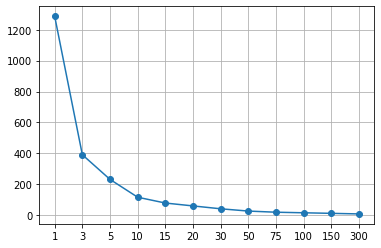

In [17]:
import matplotlib.pyplot as plt

patches = [1, 3, 5, 10, 15, 20, 30, 50, 75, 100, 150, 300]

plt.plot(list(map(str, patches)), [vit(patch_size=p, dim=14*20, dim_head=64, n_heads=2, mlp_dim=14*10*4, depth=8) / 1e6 for p in patches], marker='o')
plt.grid()
plt.show()

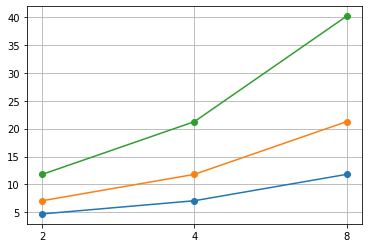

In [39]:
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=64, dim_head=32, n_heads=h, mlp_dim=128, depth=8,) / 1e6 for h in [2, 4, 8]], color='C0', marker='o')
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=64, dim_head=64, n_heads=h, mlp_dim=128, depth=8,) / 1e6 for h in [2, 4, 8]], color='C1', marker='o')
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=64, dim_head=128, n_heads=h, mlp_dim=128, depth=8,) / 1e6 for h in [2, 4, 8]], color='C2', marker='o')

plt.grid()
plt.show()

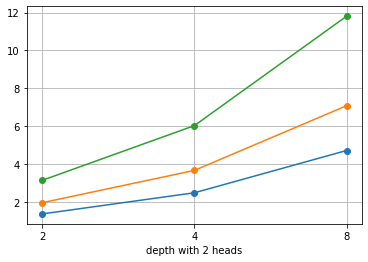

In [40]:
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=64, dim_head=32, n_heads=2, mlp_dim=128, depth=h) / 1e6 for h in [2, 4, 8]], marker='o')
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=64, dim_head=64, n_heads=2, mlp_dim=128, depth=h) / 1e6 for h in [2, 4, 8]], marker='o')
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=64, dim_head=128, n_heads=2, mlp_dim=128, depth=h) / 1e6 for h in [2, 4, 8]], marker='o')
plt.grid()
plt.xlabel('depth with 2 heads')
plt.show()

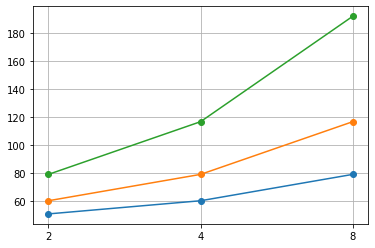

In [20]:
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=14*20, dim_head=32, n_heads=h, mlp_dim=14*10*4, depth=8) / 1e6 for h in [2, 4, 8]], marker='o')
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=14*20, dim_head=64, n_heads=h, mlp_dim=14*10*4, depth=8) / 1e6 for h in [2, 4, 8]], marker='o')
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=14*20, dim_head=128, n_heads=h, mlp_dim=14*10*4, depth=8) / 1e6 for h in [2, 4, 8]], marker='o')
plt.grid()
plt.show()

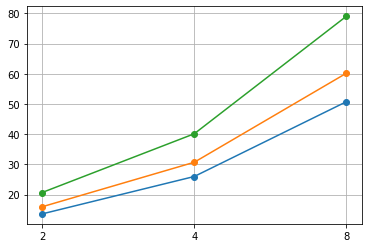

In [21]:
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=14*20, dim_head=32, n_heads=2, mlp_dim=14*10*4, depth=h) / 1e6 for h in [2, 4, 8]], marker='o')
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=14*20, dim_head=64, n_heads=2, mlp_dim=14*10*4, depth=h) / 1e6 for h in [2, 4, 8]], marker='o')
plt.plot(list(map(str, [2, 4, 8])), [vit(patch_size=20, dim=14*20, dim_head=128, n_heads=2, mlp_dim=14*10*4, depth=h) / 1e6 for h in [2, 4, 8]], marker='o')
plt.grid()
plt.show()

In [40]:
net = ViT(
        image_size = (1, 300),
        patch_size = (1, 20),
        channels = 14,
        num_classes = 8,
        dim = 64,
        depth = 1,
        heads = 8,
        mlp_dim = 256,
        dropout = 0.2,
        emb_dropout = 0,
        #pool = 'mean',
        use_cls_token = True,
        dim_head = 32
    )

from thop import profile
macs, params = profile(net, inputs=(torch.randn(1, 14, 1, 300),))
macs / 1e6, params / 1e6

[WARN] Cannot find rule for <class 'einops.layers.torch.Rearrange'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.Sequential'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.activation.Softmax'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class '__main__.Attention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class '__main__.PreNorm'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.activation.GELU'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class '__main__.FeedForward'>. Treat it as zero Macs and ze

(1.842176, 0.117192)

In [36]:
macs, params = profile(TEMPONet(n_classes=8), inputs=(torch.randn(1, 14, 300),))
macs / 1e6, params / 1e6

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv1d'>.
[INFO] Register count_bn() for <class 'torch.nn.modules.batchnorm.BatchNorm1d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_avgpool() for <class 'torch.nn.modules.pooling.AvgPool1d'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.Sequential'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class '__main__.TEMPONet'>. Treat it as zero Macs and zero Params.


(16.028672, 0.461512)

In [79]:
import numpy as np
accs = np.array([[0.5938833, 0.62450203, 0.61895857, 0.61277847],
 [0.6231558,  0.63120369, 0.61634731, 0.61405905],
 [0.64266566, 0.62926408, 0.61910074, 0.61333098]])

accs_hd = np.array([[0.58546341, 0.60936838, 0.60802253, 0.60279442],
 [0.61203811, 0.62331701, 0.61544706, 0.61644552],
 [0.63100353, 0.62733153, 0.61649075, 0.62221316]])

In [81]:
heads = [2, 4, 8]
depth = [1, 2, 4, 8,]

x = []
xx = []
y = []

import pandas as pd
res = []

for i in range(len(heads)):
    for j in range(len(depth)):
        
        net = ViT(
        image_size = (1, 300),
        patch_size = (1, 20),
        channels = 14,
        num_classes = 8,
        dim = 64,
        depth = depth[j],
        heads = heads[i],
        mlp_dim = 256,
        dropout = 0.2,
        emb_dropout = 0,
        #pool = 'mean',
        use_cls_token = True,
        dim_head = 32
        )
        
        n_params = sum([param.nelement() for param in net.parameters()]) / 10**3
        n_macs = vit(patch_size=20, dim=64, dim_head=32, n_heads=heads[i], mlp_dim=256, depth=depth[j]) / 1e6
        
        print(heads[i], depth[j], n_params, n_macs, accs[i, j])
        
        res.append({"heads": heads[i], "depth": depth[j], "params [k]": n_params, "macs [M]": n_macs, "test acc dropout=.2": accs[i,j] * 100, "test acc dropout=.5": accs_hd[i,j] * 100})
        
        x.append(n_params)
        xx.append(n_macs)
        y.append(accs[i, j])
    
print(pd.DataFrame(res).to_string(index=False))

2 1 69.512 1.088512 0.5938833
2 2 119.304 1.907712 0.62450203
2 4 218.888 3.546112 0.61895857
2 8 418.056 6.822912 0.61277847
4 1 85.896 1.383424 0.6231558
4 2 152.072 2.497536 0.63120369
4 4 284.424 4.72576 0.61634731
4 8 549.128 9.182208 0.61405905
8 1 118.664 1.973248 0.64266566
8 2 217.608 3.677184 0.62926408
8 4 415.496 7.085056 0.61910074
8 8 811.272 13.9008 0.61333098
 heads  depth  params [k]  macs [M]  test acc dropout=.2  test acc dropout=.5
     2      1      69.512  1.088512            59.388330            58.546341
     2      2     119.304  1.907712            62.450203            60.936838
     2      4     218.888  3.546112            61.895857            60.802253
     2      8     418.056  6.822912            61.277847            60.279442
     4      1      85.896  1.383424            62.315580            61.203811
     4      2     152.072  2.497536            63.120369            62.331701
     4      4     284.424  4.725760            61.634731            61.54470

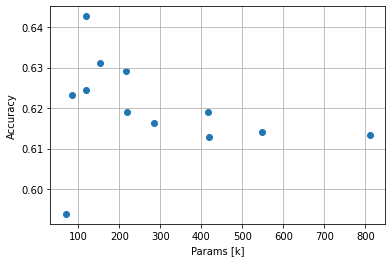

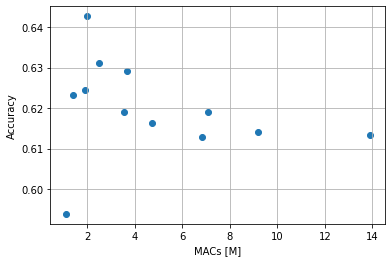

In [78]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("Params [k]")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
plt.scatter(xx, y)
plt.xlabel("MACs [M]")
plt.ylabel("Accuracy")
plt.grid()
None

In [21]:
import torch
from torch import nn, einsum
import torch.nn.functional as F

from einops import rearrange, repeat
from einops.layers.torch import Rearrange

# helpers

def pair(t):
    return t if isinstance(t, tuple) else (t, t)

# classes

class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn
    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )
    def forward(self, x):
        return self.net(x)

class Attention(nn.Module):
    def __init__(self, dim, heads = 8, dim_head = 64, dropout = 0.):
        super().__init__()
        inner_dim = dim_head *  heads
        project_out = not (heads == 1 and dim_head == dim)
               
        self.heads = heads
        self.scale = dim_head ** -0.5

        self.attend = nn.Softmax(dim = -1)
        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias = False)

        self.to_out = nn.Sequential(
            nn.Linear(inner_dim, dim),
            nn.Dropout(dropout)
        ) if project_out else nn.Identity()

    def forward(self, x):
        b, n, _, h = *x.shape, self.heads
        qkv = self.to_qkv(x)
        qkv = qkv.chunk(3, dim = -1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = h), qkv)

        dots = einsum('b h i d, b h j d -> b h i j', q, k) * self.scale

        attn = self.attend(dots)

        out = einsum('b h i j, b h j d -> b h i d', attn, v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.to_out(out)

class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim, dropout = 0.):
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                PreNorm(dim, Attention(dim, heads = heads, dim_head = dim_head, dropout = dropout)),
                PreNorm(dim, FeedForward(dim, mlp_dim, dropout = dropout))
            ]))
    def forward(self, x):
        for attn, ff in self.layers:
            x = attn(x) + x
            x = ff(x) + x
        return x

class ViT(nn.Module):
    def __init__(self, *, image_size, patch_size, num_classes, dim, depth, heads, mlp_dim, pool = 'cls', channels = 3, dim_head = 64, dropout = 0., emb_dropout = 0., use_cls_token=True):
        super().__init__()
        image_height, image_width = pair(image_size)
        patch_height, patch_width = pair(patch_size)

        assert image_height % patch_height == 0 and image_width % patch_width == 0, 'Image dimensions must be divisible by the patch size.'

        num_patches = (image_height // patch_height) * (image_width // patch_width)
        patch_dim = channels * patch_height * patch_width
        assert pool in {'cls', 'mean'}, 'pool type must be either cls (cls token) or mean (mean pooling)'

        self.to_patch_embedding = nn.Sequential(
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = patch_height, p2 = patch_width),
            nn.Linear(patch_dim, dim),
        )

        #self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        self.use_cls_token = use_cls_token
        if self.use_cls_token:
            self.pos_embedding = nn.Parameter(torch.empty(1, num_patches + 1, dim))
        else:
            self.pos_embedding = nn.Parameter(torch.empty(1, num_patches, dim))
        #nn.init.kaiming_uniform_(self.pos_embedding, a=5 ** .5)
        nn.init.normal_(self.pos_embedding, std=.02)

        #self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.cls_token = nn.Parameter(torch.empty(1, 1, dim))
        nn.init.zeros_(self.cls_token)
        
        self.dropout = nn.Dropout(emb_dropout)

        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, dropout)

        self.pool = pool
        self.to_latent = nn.Identity()

        self.mlp_head = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, num_classes)
        )

    def forward(self, img):
        # MACs: patch_size * n_patches * dim, es (30 * 14) * 10 * 300
        x = self.to_patch_embedding(img)
        b, n, _ = x.shape
        
        if self.use_cls_token:
            cls_tokens = repeat(self.cls_token, '() n d -> b n d', b = b)
            x = torch.cat((cls_tokens, x), dim=1)
            x += self.pos_embedding[:, :(n + 1)]
        else :
            x += self.pos_embedding
        
        x = self.dropout(x)
        
        # FeedForward    Attention       project out
        # 300*300*10*2 + 300*(64*3)*10 + ((64)*300*10)
        # Attention -> manca softmax e attention vera e propria, c'è solo linear encoding a qkv
        x = self.transformer(x)

        x = x.mean(dim = 1) if self.pool == 'mean' else x[:, 0]
        
        x = self.to_latent(x)
        x = self.mlp_head(x)
        return x

In [35]:
import torch
from torch import nn

# Formula: https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html#torch.nn.Conv1d
def get_conv_output_size(input_size, kernel_size, stride=1, padding=0, dilation=1, **ignore):
    tuple_to_int = lambda x: int(x[0]) if isinstance(x, tuple) else int(x)
    kernel_size, stride, padding, dilation = tuple_to_int(kernel_size), tuple_to_int(stride), tuple_to_int(padding), tuple_to_int(dilation)
    return int( ( (input_size + 2 * padding - dilation * (kernel_size - 1) - 1) / stride) + 1 )

class TEMPONet(nn.Module):
    
    def __init__(self, n_classes, input_size=300, input_channels=14):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv1d(input_channels, 32, 3, dilation=2, padding=2),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Conv1d(32, 32, 3, dilation=2, padding=2),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Conv1d(32, 64, 5, stride=1, padding=2),
            torch.nn.AvgPool1d(2, stride=2, padding=0),
            nn.BatchNorm1d(64),
            nn.ReLU(),
        )

        self.conv2 = nn.Sequential(
            nn.Conv1d(64, 64, 3, dilation=4, padding=4),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Conv1d(64, 64, 3, dilation=4, padding=4),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Conv1d(64, 128, 5, stride=2, padding=2),
            torch.nn.AvgPool1d(2, stride=2, padding=0),
            nn.BatchNorm1d(128),
            nn.ReLU(),
        )

        self.conv3 = nn.Sequential(
            nn.Conv1d(128, 128, 3, dilation=8, padding=8),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Conv1d(128, 128, 3, dilation=8, padding=8),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Conv1d(128, 128, 5, stride=4, padding=2),
            torch.nn.AvgPool1d(2, stride=2, padding=0),
            nn.BatchNorm1d(128),
            nn.ReLU(),
        )
        
        def get_fc_input_size():
            is_layer_conv = lambda x: isinstance(x, nn.Conv1d) or isinstance(x, nn.AvgPool1d)
            layers = list(filter(is_layer_conv, [*self.conv1, *self.conv2, *self.conv3]))
            
            output_size = input_size
            last_layer_output_planes = 1
            for layer in layers:
                output_size = get_conv_output_size(output_size, **vars(layer))
                last_layer_output_planes = layer.out_channels if hasattr(layer, "out_channels") else last_layer_output_planes
            
            return output_size * last_layer_output_planes

        self.fc = nn.Sequential(
            nn.Linear(get_fc_input_size(), 256), # input=640
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(128, n_classes),
        )
        

    def forward(self, x):

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        x = x.flatten(1)

        x = self.fc(x)
        
        return x